In [1]:
import numpy as np

In [2]:
import pandas as pd

C:\Users\Dell\AppData\Local\Temp\ipykernel_1428\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import precision_score

In [5]:
from sklearn.metrics import recall_score

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.metrics import classification_report

In [8]:
from sklearn import svm

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import GridSearchCV 

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
np.random.seed(42)

In [15]:
tab=list()



In [16]:
tab

[]

In [17]:
for i in range(0,1000):
    tab.append(pd.read_csv("mlgeomdata/revision/"+str(i)+".txt", decimal=".", sep=";"))

In [18]:
tab_df=pd.concat(tab)

In [19]:
tab_df.describe()

,Dip_angle,Dip_direction,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_zd,n3_xd,n3_yd,n3_zd,File_number,IDT1,IDT2,IDT3,Fault,DOC
count,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,...,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000,185980.000000
mean,1.686647,61.142806,-0.000569,0.002959,-0.003796,0.014695,0.014603,0.998450,0.608457,0.609351,...,-237.771565,-157.839927,-157.839614,-158.469627,499.615926,50.511136,50.492811,50.525067,-0.816937,0.774001
std,2.813648,60.988657,0.547986,0.548814,0.013758,0.032964,0.033867,0.020829,0.359357,0.355910,...,1523.376733,1248.742376,1248.742414,1248.662424,288.668819,28.860122,28.781770,28.945715,0.576728,0.126374
min,0.027584,0.008351,-0.996607,-0.995801,-0.054644,-0.999872,-0.997614,0.003385,-0.999954,-0.999965,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.501172
25%,0.876864,32.591833,-0.472405,-0.470729,-0.012862,0.008373,0.008352,0.999527,0.478078,0.478890,...,-0.031344,0.469176,0.468137,-0.031074,250.000000,25.000000,26.000000,25.000000,-1.000000,0.674247
50%,1.303270,47.514043,-0.001200,0.006279,-0.003735,0.013472,0.013566,0.999741,0.692470,0.689491,...,-0.023068,0.687935,0.684464,-0.022928,500.000000,51.000000,51.000000,51.000000,-1.000000,0.771623
75%,1.761939,63.283510,0.470805,0.476242,0.005225,0.020494,0.020578,0.999883,0.852906,0.853172,...,-0.015463,0.851562,0.851021,-0.015391,750.000000,75.000000,75.000000,76.000000,-1.000000,0.873968
max,89.806030,359.993103,0.998145,0.996016,0.046550,0.998130,0.999913,1.000000,0.999990,0.999987,...,-0.000520,0.999989,0.999984,-0.000481,999.000000,100.000000,100.000000,100.000000,1.000000,1.000000


In [20]:
tab_df.describe().to_csv( 'descriptive_29_05_24.csv',index=True)

In [21]:
tab_df

,Dip_angle,Dip_direction,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_zd,n3_xd,n3_yd,n3_zd,File_number,IDT1,IDT2,IDT3,Fault,DOC
0,1.556066,47.018229,-0.098949,0.446511,-0.020856,0.018513,0.019866,0.999631,0.681514,0.731301,...,-0.025033,0.579311,0.814660,-0.026963,0,26,39,78,-1,0.516929
1,1.573382,44.834329,0.187326,-0.737851,-0.001938,0.019471,0.019359,0.999623,0.708881,0.704793,...,-0.024673,0.670864,0.741059,-0.027812,0,92,22,87,-1,0.843997
2,4.400968,195.153984,0.909721,0.356969,-0.029901,-0.074067,-0.020060,0.997051,-0.962381,-0.260643,...,-0.093941,-0.958675,0.161891,-0.233953,0,74,84,60,1,0.929419
3,1.398556,60.617343,-0.098386,0.126923,-0.014820,0.011975,0.021267,0.999702,0.490494,0.871103,...,-0.013259,0.542660,0.839569,-0.025392,0,56,36,8,-1,0.858343
4,1.351324,47.106136,0.397915,0.461839,-0.029262,0.016051,0.017277,0.999722,0.680453,0.732412,...,-0.022993,0.626751,0.778690,-0.028725,0,59,43,4,-1,0.615843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2.492114,67.986653,0.721384,-0.858808,0.005701,0.016298,0.040312,0.999054,0.374468,0.926220,...,-0.064150,0.492636,0.868892,-0.048333,999,15,24,30,-1,0.934582
181,2.770334,60.448068,0.843989,-0.870900,0.004101,0.023838,0.042045,0.998831,0.492636,0.868892,...,-0.043482,0.734197,0.677817,-0.038973,999,15,26,24,-1,0.681385
182,1.417544,129.575974,0.947356,-0.040808,-0.012675,-0.015761,0.019068,0.999694,-0.636906,0.770545,...,-9999.000000,0.213669,0.976744,-0.017780,999,74,42,71,-1,0.999575
183,1.786688,36.944355,0.865806,-0.695160,0.000480,0.024918,0.018739,0.999514,0.798831,0.600747,...,-0.018436,0.713352,0.700326,-0.025919,999,71,73,87,-1,0.936754


In [22]:
tab_df.shape

(185980, 62)

In [23]:
tab_df=tab_df[(tab_df.X_C_Neighbor1!='undefined') & (tab_df.X_C_Neighbor2!='undefined') & (tab_df.X_C_Neighbor3!='undefined') & (tab_df.Z_N!=0) & (tab_df.n1_zn!=0) & (tab_df.n2_zn!=0) & (tab_df.n3_zn!=0) & (tab_df.DOC<0.90)  ]

In [24]:
tab_df

,Dip_angle,Dip_direction,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_zd,n3_xd,n3_yd,n3_zd,File_number,IDT1,IDT2,IDT3,Fault,DOC
0,1.556066,47.018229,-0.098949,0.446511,-0.020856,0.018513,0.019866,0.999631,0.681514,0.731301,...,-0.025033,0.579311,0.814660,-0.026963,0,26,39,78,-1,0.516929
1,1.573382,44.834329,0.187326,-0.737851,-0.001938,0.019471,0.019359,0.999623,0.708881,0.704793,...,-0.024673,0.670864,0.741059,-0.027812,0,92,22,87,-1,0.843997
3,1.398556,60.617343,-0.098386,0.126923,-0.014820,0.011975,0.021267,0.999702,0.490494,0.871103,...,-0.013259,0.542660,0.839569,-0.025392,0,56,36,8,-1,0.858343
4,1.351324,47.106136,0.397915,0.461839,-0.029262,0.016051,0.017277,0.999722,0.680453,0.732412,...,-0.022993,0.626751,0.778690,-0.028725,0,59,43,4,-1,0.615843
5,1.096262,48.845084,0.165883,0.519810,-0.026550,0.012591,0.014405,0.999817,0.657977,0.752795,...,-0.022618,0.638380,0.769401,-0.022201,0,86,59,38,-1,0.700072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.480051,44.029217,0.706312,-0.426848,-0.001620,0.018571,0.017952,0.999666,0.718746,0.694793,...,-0.025949,0.658082,0.752439,-0.027640,999,73,85,62,-1,0.751539
176,1.247343,47.606089,0.595339,-0.703965,0.004944,0.014677,0.016077,0.999763,0.674064,0.738352,...,-0.021501,0.709338,0.704510,-0.022465,999,53,30,4,-1,0.699473
178,1.231994,47.193960,0.639058,-0.604893,0.002719,0.014610,0.015774,0.999769,0.679362,0.733489,...,-0.022017,0.674064,0.738352,-0.021768,999,53,4,62,-1,0.738639
181,2.770334,60.448068,0.843989,-0.870900,0.004101,0.023838,0.042045,0.998831,0.492636,0.868892,...,-0.043482,0.734197,0.677817,-0.038973,999,15,26,24,-1,0.681385


In [25]:
tab_df.describe().to_csv('descriptive_14_08_24_after_cleaning.csv',index=True)

In [26]:
all_files = tab_df

In [27]:
all_files

,Dip_angle,Dip_direction,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_zd,n3_xd,n3_yd,n3_zd,File_number,IDT1,IDT2,IDT3,Fault,DOC
0,1.556066,47.018229,-0.098949,0.446511,-0.020856,0.018513,0.019866,0.999631,0.681514,0.731301,...,-0.025033,0.579311,0.814660,-0.026963,0,26,39,78,-1,0.516929
1,1.573382,44.834329,0.187326,-0.737851,-0.001938,0.019471,0.019359,0.999623,0.708881,0.704793,...,-0.024673,0.670864,0.741059,-0.027812,0,92,22,87,-1,0.843997
3,1.398556,60.617343,-0.098386,0.126923,-0.014820,0.011975,0.021267,0.999702,0.490494,0.871103,...,-0.013259,0.542660,0.839569,-0.025392,0,56,36,8,-1,0.858343
4,1.351324,47.106136,0.397915,0.461839,-0.029262,0.016051,0.017277,0.999722,0.680453,0.732412,...,-0.022993,0.626751,0.778690,-0.028725,0,59,43,4,-1,0.615843
5,1.096262,48.845084,0.165883,0.519810,-0.026550,0.012591,0.014405,0.999817,0.657977,0.752795,...,-0.022618,0.638380,0.769401,-0.022201,0,86,59,38,-1,0.700072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.480051,44.029217,0.706312,-0.426848,-0.001620,0.018571,0.017952,0.999666,0.718746,0.694793,...,-0.025949,0.658082,0.752439,-0.027640,999,73,85,62,-1,0.751539
176,1.247343,47.606089,0.595339,-0.703965,0.004944,0.014677,0.016077,0.999763,0.674064,0.738352,...,-0.021501,0.709338,0.704510,-0.022465,999,53,30,4,-1,0.699473
178,1.231994,47.193960,0.639058,-0.604893,0.002719,0.014610,0.015774,0.999769,0.679362,0.733489,...,-0.022017,0.674064,0.738352,-0.021768,999,53,4,62,-1,0.738639
181,2.770334,60.448068,0.843989,-0.870900,0.004101,0.023838,0.042045,0.998831,0.492636,0.868892,...,-0.043482,0.734197,0.677817,-0.038973,999,15,26,24,-1,0.681385


In [28]:
Euclidean_n=all_files[['EuclideanNeighbor1_N', 'EuclideanNeighbor2_N','EuclideanNeighbor3_N']]
Euclidean_d=all_files[['EuclideanNeighbor1_D', 'EuclideanNeighbor2_D','EuclideanNeighbor3_D']]

Cosine_n=all_files[['CosineNeighbor1_N', 'CosineNeighbor2_N','CosineNeighbor3_N']]
Cosine_d=all_files[['CosineNeighbor1_D', 'CosineNeighbor2_D','CosineNeighbor3_D']]

Angle_n=all_files[['AngleNeighbor1_N', 'AngleNeighbor2_N','AngleNeighbor3_N']]
Angle_d=all_files[['AngleNeighbor1_D', 'AngleNeighbor2_D','AngleNeighbor3_D']]

In [29]:
def get_new_values_Euclidean_N(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Euclidean_N_Max', 'Euclidean_N_Min', 'Euclidean_N_Intermediate'])

def get_new_values_Euclidean_D(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Euclidean_D_Max', 'Euclidean_D_Min', 'Euclidean_D_Intermediate'])

def get_new_values_Cosine_N(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Cosine_N_Max', 'Cosine_N_Min', 'Cosine_N_Intermediate'])

def get_new_values_Cosine_D(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Cosine_D_Max', 'Cosine_D_Min', 'Cosine_D_Intermediate'])

def get_new_values_Angle_N(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Angle_N_Max', 'Angle_N_Min', 'Angle_N_Intermediate'])

def get_new_values_Angle_D(row):
    max_val = row.max()
    min_val = row.min()
    remaining_val = row.sum() - max_val - min_val
    return pd.Series([max_val, min_val, remaining_val], index=['Angle_D_Max', 'Angle_D_Min', 'Angle_D_Intermediate'])




In [30]:
# Creating max columns for the variables
ordered_Euclidean_N = Euclidean_n.apply(get_new_values_Euclidean_N, axis=1)
ordered_Euclidean_D = Euclidean_d.apply(get_new_values_Euclidean_D, axis=1)

ordered_Cosine_N = Cosine_n.apply(get_new_values_Cosine_N, axis=1)
ordered_Cosine_D = Cosine_d.apply(get_new_values_Cosine_D, axis=1)

ordered_Angle_N = Angle_n.apply(get_new_values_Angle_N, axis=1)
ordered_Angle_D = Angle_d.apply(get_new_values_Angle_D, axis=1)

In [31]:
all_files.columns

Index(['Dip_angle', 'Dip_direction', 'X_C', 'Y_C', 'Z_C', 'X_N', 'Y_N', 'Z_N',
       'X_D', 'Y_D', 'Z_D', 'X_C_Neighbor1', 'Y_C_Neighbor1', 'Z_C_Neighbor1',
       'X_C_Neighbor2', 'Y_C_Neighbor2', 'Z_C_Neighbor2', 'X_C_Neighbor3',
       'Y_C_Neighbor3', 'Z_C_Neighbor3', 'EuclideanNeighbor1_N',
       'EuclideanNeighbor2_N', 'EuclideanNeighbor3_N', 'AngleNeighbor1_N',
       'AngleNeighbor2_N', 'AngleNeighbor3_N', 'CosineNeighbor1_N',
       'CosineNeighbor2_N', 'CosineNeighbor3_N', 'EuclideanNeighbor1_D',
       'EuclideanNeighbor2_D', 'EuclideanNeighbor3_D', 'AngleNeighbor1_D',
       'AngleNeighbor2_D', 'AngleNeighbor3_D', 'CosineNeighbor1_D',
       'CosineNeighbor2_D', 'CosineNeighbor3_D', 'n1_xn', 'n1_yn', 'n1_zn',
       'n2_xn', 'n2_yn', 'n2_zn', 'n3_xn', 'n3_yn', 'n3_zn', 'n1_xd', 'n1_yd',
       'n1_zd', 'n2_xd', 'n2_yd', 'n2_zd', 'n3_xd', 'n3_yd', 'n3_zd',
       'File_number', 'IDT1', 'IDT2', 'IDT3', 'Fault', 'DOC'],
      dtype='object')

In [32]:
#all_files[['XN']] ,all_files[['YN']],all_files[['ZN']],all_files[['XD']],all_files[['YD']],all_files[['ZD']],
all_neighbors_representatives=pd.concat([
    all_files[['EuclideanNeighbor1_N']], all_files[['EuclideanNeighbor2_N']], all_files[['EuclideanNeighbor3_N']], 
   all_files[['AngleNeighbor1_N']], all_files[['AngleNeighbor2_N']], all_files[['AngleNeighbor3_N']], 
    all_files[['CosineNeighbor1_N']],    all_files[['CosineNeighbor2_N']], all_files[['CosineNeighbor3_N']], 
    all_files[['EuclideanNeighbor1_D']],     all_files[['EuclideanNeighbor2_D']], all_files[['EuclideanNeighbor3_D']], 
    all_files[['AngleNeighbor1_D']],     all_files[['AngleNeighbor2_D']], all_files[['AngleNeighbor3_D']], 
    all_files[['CosineNeighbor1_D']],   all_files[['CosineNeighbor2_D']], all_files[['CosineNeighbor3_D']],
    all_files[['X_N']] ,all_files[['Y_N']],all_files[['Z_N']],
    all_files[['X_D']],all_files[['Y_D']],all_files[['Z_D']],   
    ordered_Euclidean_N, ordered_Euclidean_D, ordered_Cosine_N, 
    ordered_Cosine_D, ordered_Angle_N, ordered_Angle_D,
     all_files[['File_number']],
    all_files[['Fault']]   ], axis=1)

In [33]:
all_neighbors_representatives

,EuclideanNeighbor1_N,EuclideanNeighbor2_N,EuclideanNeighbor3_N,AngleNeighbor1_N,AngleNeighbor2_N,AngleNeighbor3_N,CosineNeighbor1_N,CosineNeighbor2_N,CosineNeighbor3_N,EuclideanNeighbor1_D,...,Cosine_D_Min,Cosine_D_Intermediate,Angle_N_Max,Angle_N_Min,Angle_N_Intermediate,Angle_D_Max,Angle_D_Min,Angle_D_Intermediate,File_number,Fault
0,0.005307,0.002287,0.003575,0.304043,0.131035,0.204844,1.407970e-05,2.615160e-06,6.391040e-06,0.140068,...,0.000533,0.008697,0.304043,0.131035,0.204844,8.03187,1.870590,7.562080,0,-1
1,0.001880,0.004645,0.001495,0.107730,0.266159,0.085670,1.767670e-06,1.078960e-05,1.117840e-06,0.032277,...,0.000521,0.001380,0.266159,0.085670,0.107730,8.18982,1.849400,3.010740,0,-1
3,0.012803,0.013096,0.001810,0.733549,0.750351,0.103704,8.195520e-05,8.575270e-05,1.637990e-06,0.458461,...,0.001858,0.072927,0.750351,0.103704,0.733549,26.50350,3.493560,22.016900,0,-1
4,0.000111,0.001773,0.005465,0.006374,0.101583,0.313096,6.187860e-09,1.571680e-06,1.493060e-05,0.003814,...,0.000007,0.002526,0.313096,0.006374,0.101583,4.11389,0.218508,4.073310,0,-1
5,0.004416,0.005747,0.003115,0.253029,0.329299,0.178449,9.751390e-06,1.651600e-05,4.850100e-06,0.102174,...,0.000335,0.005220,0.329299,0.178449,0.253029,12.60780,1.482210,5.856700,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.005746,0.001142,0.002879,0.329228,0.065413,0.164942,1.650880e-05,6.517170e-07,4.143700e-06,0.175741,...,0.000961,0.003503,0.329228,0.065413,0.164942,10.08220,2.511980,4.797280,999,-1
176,0.002349,0.000310,0.001286,0.134567,0.017751,0.073711,2.758030e-06,4.799320e-08,8.275330e-07,0.103480,...,0.000026,0.001195,0.134567,0.017751,0.073711,5.93162,0.412318,2.801340,999,-1
178,0.004458,0.002702,0.000310,0.255419,0.154811,0.017751,9.936430e-06,3.650280e-06,4.799320e-08,0.012214,...,0.000026,0.000075,0.255419,0.017751,0.154811,6.98718,0.412318,0.699844,999,-1
181,0.060758,0.007740,0.016334,3.481740,0.443474,0.935895,1.845790e-03,2.995430e-05,1.334040e-04,1.998230,...,0.008637,0.047475,3.481740,0.443474,0.935895,17.72560,4.817980,7.535760,999,-1


In [34]:
#you can modify the below code to determine a fraction of the data set by replacing 1 with 0.9, for example
#all_neighbors_representatives=all_neighbors_representatives.head(int(1*all_neighbors_representatives.shape[0]))

In [35]:
all_files_training=all_neighbors_representatives

In [36]:
all_files_training

,EuclideanNeighbor1_N,EuclideanNeighbor2_N,EuclideanNeighbor3_N,AngleNeighbor1_N,AngleNeighbor2_N,AngleNeighbor3_N,CosineNeighbor1_N,CosineNeighbor2_N,CosineNeighbor3_N,EuclideanNeighbor1_D,...,Cosine_D_Min,Cosine_D_Intermediate,Angle_N_Max,Angle_N_Min,Angle_N_Intermediate,Angle_D_Max,Angle_D_Min,Angle_D_Intermediate,File_number,Fault
0,0.005307,0.002287,0.003575,0.304043,0.131035,0.204844,1.407970e-05,2.615160e-06,6.391040e-06,0.140068,...,0.000533,0.008697,0.304043,0.131035,0.204844,8.03187,1.870590,7.562080,0,-1
1,0.001880,0.004645,0.001495,0.107730,0.266159,0.085670,1.767670e-06,1.078960e-05,1.117840e-06,0.032277,...,0.000521,0.001380,0.266159,0.085670,0.107730,8.18982,1.849400,3.010740,0,-1
3,0.012803,0.013096,0.001810,0.733549,0.750351,0.103704,8.195520e-05,8.575270e-05,1.637990e-06,0.458461,...,0.001858,0.072927,0.750351,0.103704,0.733549,26.50350,3.493560,22.016900,0,-1
4,0.000111,0.001773,0.005465,0.006374,0.101583,0.313096,6.187860e-09,1.571680e-06,1.493060e-05,0.003814,...,0.000007,0.002526,0.313096,0.006374,0.101583,4.11389,0.218508,4.073310,0,-1
5,0.004416,0.005747,0.003115,0.253029,0.329299,0.178449,9.751390e-06,1.651600e-05,4.850100e-06,0.102174,...,0.000335,0.005220,0.329299,0.178449,0.253029,12.60780,1.482210,5.856700,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.005746,0.001142,0.002879,0.329228,0.065413,0.164942,1.650880e-05,6.517170e-07,4.143700e-06,0.175741,...,0.000961,0.003503,0.329228,0.065413,0.164942,10.08220,2.511980,4.797280,999,-1
176,0.002349,0.000310,0.001286,0.134567,0.017751,0.073711,2.758030e-06,4.799320e-08,8.275330e-07,0.103480,...,0.000026,0.001195,0.134567,0.017751,0.073711,5.93162,0.412318,2.801340,999,-1
178,0.004458,0.002702,0.000310,0.255419,0.154811,0.017751,9.936430e-06,3.650280e-06,4.799320e-08,0.012214,...,0.000026,0.000075,0.255419,0.017751,0.154811,6.98718,0.412318,0.699844,999,-1
181,0.060758,0.007740,0.016334,3.481740,0.443474,0.935895,1.845790e-03,2.995430e-05,1.334040e-04,1.998230,...,0.008637,0.047475,3.481740,0.443474,0.935895,17.72560,4.817980,7.535760,999,-1


In [37]:
class_count_0, class_count_1 = all_files_training['Fault'].value_counts()

In [38]:
class_count_0

132886

In [39]:
class_count_1

12411

In [40]:
class_0 = all_files_training[all_files_training['Fault'] == -1]
class_1 = all_files_training[all_files_training['Fault'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (132886, 44)
class 1: (12411, 44)


In [41]:
class_0_under = class_0.sample(class_count_1, random_state=42)

all_files_training = pd.concat([class_0_under, class_1], axis=0)

In [42]:
all_files_training.columns

Index(['EuclideanNeighbor1_N', 'EuclideanNeighbor2_N', 'EuclideanNeighbor3_N',
       'AngleNeighbor1_N', 'AngleNeighbor2_N', 'AngleNeighbor3_N',
       'CosineNeighbor1_N', 'CosineNeighbor2_N', 'CosineNeighbor3_N',
       'EuclideanNeighbor1_D', 'EuclideanNeighbor2_D', 'EuclideanNeighbor3_D',
       'AngleNeighbor1_D', 'AngleNeighbor2_D', 'AngleNeighbor3_D',
       'CosineNeighbor1_D', 'CosineNeighbor2_D', 'CosineNeighbor3_D', 'X_N',
       'Y_N', 'Z_N', 'X_D', 'Y_D', 'Z_D', 'Euclidean_N_Max', 'Euclidean_N_Min',
       'Euclidean_N_Intermediate', 'Euclidean_D_Max', 'Euclidean_D_Min',
       'Euclidean_D_Intermediate', 'Cosine_N_Max', 'Cosine_N_Min',
       'Cosine_N_Intermediate', 'Cosine_D_Max', 'Cosine_D_Min',
       'Cosine_D_Intermediate', 'Angle_N_Max', 'Angle_N_Min',
       'Angle_N_Intermediate', 'Angle_D_Max', 'Angle_D_Min',
       'Angle_D_Intermediate', 'File_number', 'Fault'],
      dtype='object')

In [43]:
all_files_training.to_csv('all_files_training_14_08_24_v3.csv',index=True)

In [45]:
all_files_training.shape

(24822, 44)

In [46]:
dataset = {}
dataset["data"] = all_files_training.iloc[:, 18:42 ]
dataset["target"]=  all_files_training.iloc[:,43:44]

In [47]:
dataset

{'data':           X_N       Y_N       Z_N       X_D       Y_D       Z_D  \
 61   0.005693  0.001942  0.999982  0.946433  0.322844 -0.006015   
 54   0.027991  0.024014  0.999320  0.758454  0.650682 -0.036880   
 118  0.007727  0.007881  0.999939  0.700067  0.713992 -0.011037   
 162  0.021158  0.013790  0.999681  0.837489  0.545870 -0.025255   
 32   0.017254  0.016867  0.999709  0.714874  0.698837 -0.024129   
 ..        ...       ...       ...       ...       ...       ...   
 76  -0.001803  0.022469  0.999746 -0.079958  0.996543 -0.022542   
 79   0.000415  0.029151  0.999575  0.014225  0.999474 -0.029154   
 80  -0.018583 -0.006727  0.999805 -0.940107 -0.340307 -0.019763   
 83  -0.080809 -0.001659  0.996728 -0.996518 -0.020458 -0.080826   
 87  -0.103544  0.037413  0.993921 -0.934773  0.337756 -0.110095   
 
      Euclidean_N_Max  Euclidean_N_Min  Euclidean_N_Intermediate  \
 61          0.011330         0.008805                  0.010745   
 54          0.011168         0.003719

In [48]:
X =  dataset['data']
y =  dataset['target']

In [49]:
dataset["data"].columns

Index(['X_N', 'Y_N', 'Z_N', 'X_D', 'Y_D', 'Z_D', 'Euclidean_N_Max',
       'Euclidean_N_Min', 'Euclidean_N_Intermediate', 'Euclidean_D_Max',
       'Euclidean_D_Min', 'Euclidean_D_Intermediate', 'Cosine_N_Max',
       'Cosine_N_Min', 'Cosine_N_Intermediate', 'Cosine_D_Max', 'Cosine_D_Min',
       'Cosine_D_Intermediate', 'Angle_N_Max', 'Angle_N_Min',
       'Angle_N_Intermediate', 'Angle_D_Max', 'Angle_D_Min',
       'Angle_D_Intermediate'],
      dtype='object')

In [50]:
dataset['target'] 

,Fault
61,-1
54,-1
118,-1
162,-1
32,-1
...,...
76,1
79,1
80,1
83,1


In [51]:
y.value_counts()

Fault
-1       12411
 1       12411
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [53]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [54]:
len(X_train), len(X_test)

(18616, 6206)

In [55]:
y_train=np.ravel(y_train) 

In [56]:
y_test=np.ravel(y_test)

In [57]:
models = {}
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(kernel="rbf", C=0.05, random_state=42)


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall, confusion, classification_rep = {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    confusion[key]=confusion_matrix(predictions, y_test)
    classification_rep[key]=classification_report(predictions, y_test, target_names=['homocline', 'Fault'])


In [59]:
models['Support Vector Machines']._gamma

0.04166666666666667

In [60]:
classification_rep.keys()

dict_keys(['Support Vector Machines'])

In [61]:
print(confusion['Support Vector Machines'])

[[2993  243]
 [ 123 2847]]


In [62]:
tn, fp, fn, tp =confusion['Support Vector Machines'].ravel()

In [63]:
(tn, fp, fn, tp)

(2993, 243, 123, 2847)

In [64]:
print(classification_rep['Support Vector Machines'])

              precision    recall  f1-score   support

   homocline       0.96      0.92      0.94      3236
       Fault       0.92      0.96      0.94      2970

    accuracy                           0.94      6206
   macro avg       0.94      0.94      0.94      6206
weighted avg       0.94      0.94      0.94      6206



In [65]:
#Hyperparameter tuning, defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  

In [66]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring='f1')

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=  23.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=  18.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=  20.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=  20.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=  24.4s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.948 total time=   4.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.941 total time=   4.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   8.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   4.6s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.937 total time=   2.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   7.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='f1', verbose=3)

In [68]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [71]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [72]:
models_tuning = {}
models_tuning['Support Vector Machines'] = SVC(kernel="rbf", C=10, gamma=0.1, random_state=42)

In [73]:
accuracy_tuning, precision_tuning, recall_tuning, confusion_tuning, classification_rep_tuning = {}, {}, {}, {}, {}


In [74]:
for key in models_tuning.keys():
    
    # Fit the classifier
    models_tuning[key].fit(X_train, y_train)
    
    # Make predictions
    predictions_tuning = models_tuning[key].predict(X_test)
    
    # Calculate metrics
    accuracy_tuning[key] = accuracy_score(predictions_tuning, y_test)
    precision_tuning[key] = precision_score(predictions_tuning, y_test)
    recall_tuning[key] = recall_score(predictions_tuning, y_test)
    confusion_tuning[key]=confusion_matrix(predictions_tuning, y_test)
    classification_rep_tuning[key]=classification_report(predictions_tuning, y_test, target_names=['homocline', 'Fault'])


In [75]:
classification_rep_tuning.keys()

dict_keys(['Support Vector Machines'])

In [76]:
print(confusion_tuning['Support Vector Machines'])

[[2982  163]
 [ 134 2927]]


In [77]:
tn, fp, fn, tp =confusion_tuning['Support Vector Machines'].ravel()

In [78]:
tn, fp, fn, tp

(2982, 163, 134, 2927)

In [80]:
print(classification_rep_tuning['Support Vector Machines'])

              precision    recall  f1-score   support

   homocline       0.96      0.95      0.95      3145
       Fault       0.95      0.96      0.95      3061

    accuracy                           0.95      6206
   macro avg       0.95      0.95      0.95      6206
weighted avg       0.95      0.95      0.95      6206



In [81]:
#Testing real data

In [222]:
tab_mono=pd.read_csv("mlgeomdata/KSH6.txt", decimal=".", sep=";")

In [223]:
tab_mono.shape

(1603, 60)

In [224]:
tab_mono

,Dip_ang,Dip_dir,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_xd,n2_yd,n2_zd,n3_xd,n3_yd,n3_zd,IDT1,IDT2,IDT3,DOC
0,1.159130,46.169060,919729.743333,253500.996667,222.526667,0.014009,0.014593,0.999795,0.692391,0.721239,...,0.302840,0.952318,-0.037131,0.702578,0.711208,-0.023805,58,66,82,0.605231
1,0.384032,41.407344,922129.150000,248336.643333,247.466667,0.005027,0.004433,0.999978,0.750009,0.661393,...,-0.239745,0.970758,-0.012312,0.763336,0.645817,-0.015416,501,488,469,0.786498
2,1.990172,94.352276,921097.226667,250946.403333,222.926667,-0.002635,0.034628,0.999397,-0.075843,0.996515,...,-0.236503,0.971012,-0.034671,-0.054377,0.997929,-0.034369,268,278,260,0.687838
3,1.832122,43.287073,922932.003333,249384.803333,227.776667,0.023273,0.021921,0.999489,0.727555,0.685304,...,0.732118,0.680368,-0.033209,0.800962,0.597723,-0.034443,667,677,640,0.597122
4,1.180099,36.660156,920497.100000,251283.926667,239.206667,0.016521,0.012297,0.999788,0.802021,0.596941,...,0.814878,-0.577313,-0.051793,0.802470,0.596251,-0.022955,190,186,176,0.727719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,3.723528,21.021905,923029.516667,248126.393333,197.973333,0.060620,0.023296,0.997889,0.931473,0.357968,...,0.916948,0.391712,-0.075948,0.301657,0.952465,-0.042584,673,661,702,0.652673
1599,5.013178,298.031467,922857.400000,248021.540000,203.403333,0.041067,-0.077134,0.996175,0.468159,-0.879313,...,-0.007753,0.998050,-0.061935,-0.072524,0.856586,-0.510882,574,702,661,0.974583
1600,30.722628,94.839476,922987.766667,248007.263333,202.010000,-0.043100,0.509061,0.859651,-0.072524,0.856586,...,0.468159,-0.879313,-0.087385,0.428054,0.903326,-0.027774,574,731,702,0.998063
1601,1.943857,100.685224,923221.670000,248237.123333,187.793333,-0.006289,0.033332,0.999425,-0.185307,0.982095,...,0.467527,-0.883066,-0.040163,-0.526624,0.849592,-0.029340,701,720,729,0.561513


In [225]:
tab_mono=tab_mono[(tab_mono.X_C_Neighbor1!='undefined') & (tab_mono.X_C_Neighbor2!='undefined') & (tab_mono.X_C_Neighbor3!='undefined')  & (tab_mono.Z_N!=0) & (tab_mono.n1_zn!=0) & (tab_mono.n2_zn!=0) & (tab_mono.n3_zn!=0) & (tab_mono.DOC<0.90)  ]

In [226]:
tab_mono.shape

(1497, 60)

In [227]:
tab_mono.dtypes

Dip_ang                 float64
Dip_dir                 float64
X_C                     float64
Y_C                     float64
Z_C                     float64
X_N                     float64
Y_N                     float64
Z_N                     float64
X_D                     float64
Y_D                     float64
Z_D                     float64
X_C_Neighbor1            object
Y_C_Neighbor1            object
Z_C_Neighbor1            object
X_C_Neighbor2            object
Y_C_Neighbor2            object
Z_C_Neighbor2            object
X_C_Neighbor3            object
Y_C_Neighbor3            object
Z_C_Neighbor3            object
EuclideanNeighbor1_N    float64
EuclideanNeighbor2_N    float64
EuclideanNeighbor3_N    float64
AngleNeighbor1_N        float64
AngleNeighbor2_N        float64
AngleNeighbor3_N        float64
CosineNeighbor1_N       float64
CosineNeighbor2_N       float64
CosineNeighbor3_N       float64
EuclideanNeighbor1_D    float64
EuclideanNeighbor2_D    float64
Euclidea

In [228]:
tab_mono.loc[:,"X_C_Neighbor1"] = tab_mono["X_C_Neighbor1"].astype(float) 
tab_mono.loc[:,"Y_C_Neighbor1"] = tab_mono["Y_C_Neighbor1"].astype(float)
tab_mono.loc[:,"Z_C_Neighbor1"] = tab_mono["Z_C_Neighbor1"].astype(float)

tab_mono.loc[:,"X_C_Neighbor2"] = tab_mono["X_C_Neighbor2"].astype(float) 
tab_mono.loc[:,"Y_C_Neighbor2"] = tab_mono["Y_C_Neighbor2"].astype(float)
tab_mono.loc[:,"Z_C_Neighbor2"] = tab_mono["Z_C_Neighbor2"].astype(float)

tab_mono.loc[:,"X_C_Neighbor3"] = tab_mono["X_C_Neighbor3"].astype(float) 
tab_mono.loc[:,"Y_C_Neighbor3"] = tab_mono["Y_C_Neighbor3"].astype(float)
tab_mono.loc[:,"Z_C_Neighbor3"] = tab_mono["Z_C_Neighbor3"].astype(float)





In [229]:
tab_mono.shape

(1497, 60)

In [230]:
tab_mono

,Dip_ang,Dip_dir,X_C,Y_C,Z_C,X_N,Y_N,Z_N,X_D,Y_D,...,n2_xd,n2_yd,n2_zd,n3_xd,n3_yd,n3_zd,IDT1,IDT2,IDT3,DOC
0,1.159130,46.169060,919729.743333,253500.996667,222.526667,0.014009,0.014593,0.999795,0.692391,0.721239,...,0.302840,0.952318,-0.037131,0.702578,0.711208,-0.023805,58,66,82,0.605231
1,0.384032,41.407344,922129.150000,248336.643333,247.466667,0.005027,0.004433,0.999978,0.750009,0.661393,...,-0.239745,0.970758,-0.012312,0.763336,0.645817,-0.015416,501,488,469,0.786498
2,1.990172,94.352276,921097.226667,250946.403333,222.926667,-0.002635,0.034628,0.999397,-0.075843,0.996515,...,-0.236503,0.971012,-0.034671,-0.054377,0.997929,-0.034369,268,278,260,0.687838
3,1.832122,43.287073,922932.003333,249384.803333,227.776667,0.023273,0.021921,0.999489,0.727555,0.685304,...,0.732118,0.680368,-0.033209,0.800962,0.597723,-0.034443,667,677,640,0.597122
4,1.180099,36.660156,920497.100000,251283.926667,239.206667,0.016521,0.012297,0.999788,0.802021,0.596941,...,0.814878,-0.577313,-0.051793,0.802470,0.596251,-0.022955,190,186,176,0.727719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2.440609,72.426395,922918.636667,248192.183333,200.523333,0.012857,0.040596,0.999093,0.301657,0.952465,...,0.409873,0.911488,-0.034556,0.095088,0.994892,-0.033872,641,661,673,0.521000
1597,2.301815,297.898338,923196.840000,248332.326667,188.730000,0.018793,-0.035496,0.999193,0.467527,-0.883066,...,0.251361,-0.966876,-0.044376,0.727368,-0.684139,-0.053748,703,701,729,0.552602
1598,3.723528,21.021905,923029.516667,248126.393333,197.973333,0.060620,0.023296,0.997889,0.931473,0.357968,...,0.916948,0.391712,-0.075948,0.301657,0.952465,-0.042584,673,661,702,0.652673
1601,1.943857,100.685224,923221.670000,248237.123333,187.793333,-0.006289,0.033332,0.999425,-0.185307,0.982095,...,0.467527,-0.883066,-0.040163,-0.526624,0.849592,-0.029340,701,720,729,0.561513


In [231]:
Euclidean_n_mono=tab_mono[['EuclideanNeighbor1_N', 'EuclideanNeighbor2_N','EuclideanNeighbor3_N']]
Euclidean_d_mono=tab_mono[['EuclideanNeighbor1_D', 'EuclideanNeighbor2_D','EuclideanNeighbor3_D']]

Cosine_n_mono=tab_mono[['CosineNeighbor1_N', 'CosineNeighbor2_N','CosineNeighbor3_N']]
Cosine_d_mono=tab_mono[['CosineNeighbor1_D', 'CosineNeighbor2_D','CosineNeighbor3_D']]

Angle_n_mono=tab_mono[['AngleNeighbor1_N', 'AngleNeighbor2_N','AngleNeighbor3_N']]
Angle_d_mono=tab_mono[['AngleNeighbor1_D', 'AngleNeighbor2_D','AngleNeighbor3_D']]

In [232]:
# Creating max columns for the variables
ordered_Euclidean_N_mono = Euclidean_n_mono.apply(get_new_values_Euclidean_N, axis=1)
ordered_Euclidean_D_mono = Euclidean_d_mono.apply(get_new_values_Euclidean_D, axis=1)

ordered_Cosine_N_mono = Cosine_n_mono.apply(get_new_values_Cosine_N, axis=1)
ordered_Cosine_D_mono = Cosine_d_mono.apply(get_new_values_Cosine_D, axis=1)

ordered_Angle_N_mono = Angle_n_mono.apply(get_new_values_Angle_N, axis=1)
ordered_Angle_D_mono = Angle_d_mono.apply(get_new_values_Angle_D, axis=1)

In [233]:
#[tab_mono['XN'],  tab_mono['YN'], tab_mono['ZN'],
training_mono=pd.concat([ 
    tab_mono[['X_C']], tab_mono[['Y_C']] , 
    tab_mono[['EuclideanNeighbor1_N']], tab_mono[['EuclideanNeighbor2_N']], tab_mono[['EuclideanNeighbor3_N']], 
     tab_mono[['AngleNeighbor1_N']], tab_mono[['AngleNeighbor2_N']], tab_mono[['AngleNeighbor3_N']], 
    tab_mono[['CosineNeighbor1_N']],    tab_mono[['CosineNeighbor2_N']], tab_mono[['CosineNeighbor3_N']], 
    tab_mono[['EuclideanNeighbor1_D']],     tab_mono[['EuclideanNeighbor2_D']], tab_mono[['EuclideanNeighbor3_D']], 
    tab_mono[['AngleNeighbor1_D']],     tab_mono[['AngleNeighbor2_D']], tab_mono[['AngleNeighbor3_D']], 
    tab_mono[['CosineNeighbor1_D']],   tab_mono[['CosineNeighbor2_D']], tab_mono[['CosineNeighbor3_D']],
    tab_mono[['X_N']] ,tab_mono[['Y_N']],tab_mono[['Z_N']],
    tab_mono[['X_D']],tab_mono[['Y_D']],tab_mono[['Z_D']], 
    ordered_Euclidean_N_mono, ordered_Euclidean_D_mono, ordered_Cosine_N_mono,
    ordered_Cosine_D_mono, ordered_Angle_N_mono, ordered_Angle_D_mono  ], axis=1)

In [234]:
training_mono

,X_C,Y_C,EuclideanNeighbor1_N,EuclideanNeighbor2_N,EuclideanNeighbor3_N,AngleNeighbor1_N,AngleNeighbor2_N,AngleNeighbor3_N,CosineNeighbor1_N,CosineNeighbor2_N,...,Cosine_N_Intermediate,Cosine_D_Max,Cosine_D_Min,Cosine_D_Intermediate,Angle_N_Max,Angle_N_Min,Angle_N_Intermediate,Angle_D_Max,Angle_D_Min,Angle_D_Intermediate
0,919729.743333,253500.996667,0.001318,0.020979,0.003590,0.075508,1.202043,0.205697,0.000001,0.000220,...,6.000000e-06,0.102716,0.000109,0.002001,1.202043,0.075508,0.205697,26.196732,0.844355,3.624989
1,922129.150000,248336.643333,0.001702,0.010964,0.008716,0.097490,0.628212,0.499389,0.000001,0.000060,...,3.800000e-05,0.537676,0.000248,0.030483,0.628212,0.097490,0.499389,62.462844,1.276241,14.183271
2,921097.226667,250946.403333,0.024644,0.005648,0.000826,1.412057,0.323623,0.047332,0.000304,0.000016,...,1.600000e-05,0.013231,0.000231,0.006498,1.412057,0.047332,0.323623,9.330701,1.232784,6.535435
3,922932.003333,249384.803333,0.001446,0.001257,0.004529,0.082871,0.072039,0.259501,0.000001,0.000001,...,1.000000e-06,0.006532,0.000023,0.000575,0.259501,0.072039,0.082871,6.552593,0.391562,1.942316
4,920497.100000,251283.926667,0.000715,0.049476,0.002360,0.040954,2.835044,0.135230,0.000000,0.001224,...,3.000000e-06,0.690006,0.000003,0.000540,2.835044,0.040954,0.135230,71.941106,0.143173,1.883723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,922918.636667,248192.183333,0.050813,0.009180,0.011843,2.911700,0.525973,0.678531,0.001291,0.000042,...,7.000000e-05,0.375298,0.006727,0.022273,2.911700,0.525973,0.678531,51.339659,6.649655,12.115455
1597,923196.840000,248332.326667,0.073256,0.010665,0.020412,4.198183,0.611087,1.169541,0.002683,0.000057,...,2.080000e-04,1.952528,0.026885,0.053637,4.198183,0.611087,1.169541,18.850824,13.315812,17.725076
1598,923029.516667,248126.393333,0.102330,0.011332,0.050813,5.865643,0.649307,2.911700,0.005236,0.000064,...,1.291000e-03,0.873014,0.000735,0.375298,5.865643,0.649307,2.911700,82.704513,2.197453,51.339659
1601,923221.670000,248237.123333,0.032964,0.073256,0.012432,1.888776,4.198183,0.712291,0.000543,0.002683,...,5.430000e-04,1.952528,0.067038,0.496056,4.198183,0.712291,1.888776,59.738750,17.725076,21.098637


In [235]:
training_mono.shape

(1497, 44)

In [236]:
training_mono.columns

Index(['X_C', 'Y_C', 'EuclideanNeighbor1_N', 'EuclideanNeighbor2_N',
       'EuclideanNeighbor3_N', 'AngleNeighbor1_N', 'AngleNeighbor2_N',
       'AngleNeighbor3_N', 'CosineNeighbor1_N', 'CosineNeighbor2_N',
       'CosineNeighbor3_N', 'EuclideanNeighbor1_D', 'EuclideanNeighbor2_D',
       'EuclideanNeighbor3_D', 'AngleNeighbor1_D', 'AngleNeighbor2_D',
       'AngleNeighbor3_D', 'CosineNeighbor1_D', 'CosineNeighbor2_D',
       'CosineNeighbor3_D', 'X_N', 'Y_N', 'Z_N', 'X_D', 'Y_D', 'Z_D',
       'Euclidean_N_Max', 'Euclidean_N_Min', 'Euclidean_N_Intermediate',
       'Euclidean_D_Max', 'Euclidean_D_Min', 'Euclidean_D_Intermediate',
       'Cosine_N_Max', 'Cosine_N_Min', 'Cosine_N_Intermediate', 'Cosine_D_Max',
       'Cosine_D_Min', 'Cosine_D_Intermediate', 'Angle_N_Max', 'Angle_N_Min',
       'Angle_N_Intermediate', 'Angle_D_Max', 'Angle_D_Min',
       'Angle_D_Intermediate'],
      dtype='object')

In [237]:
#X_N: [20,21,22,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]
dataset_mono = {}
dataset_mono["data"] =training_mono.iloc[:, 20:44 ]

In [238]:
dataset_mono["data"]

,X_N,Y_N,Z_N,X_D,Y_D,Z_D,Euclidean_N_Max,Euclidean_N_Min,Euclidean_N_Intermediate,Euclidean_D_Max,...,Cosine_N_Intermediate,Cosine_D_Max,Cosine_D_Min,Cosine_D_Intermediate,Angle_N_Max,Angle_N_Min,Angle_N_Intermediate,Angle_D_Max,Angle_D_Min,Angle_D_Intermediate
0,0.014009,0.014593,0.999795,0.692391,0.721239,-0.020229,0.020979,0.001318,0.003590,0.453247,...,6.000000e-06,0.102716,0.000109,0.002001,1.202043,0.075508,0.205697,26.196732,0.844355,3.624989
1,0.005027,0.004433,0.999978,0.750009,0.661393,-0.006703,0.010964,0.001702,0.008716,1.036992,...,3.800000e-05,0.537676,0.000248,0.030483,0.628212,0.097490,0.499389,62.462844,1.276241,14.183271
2,-0.002635,0.034628,0.999397,-0.075843,0.996515,-0.034728,0.024644,0.000826,0.005648,0.162672,...,1.600000e-05,0.013231,0.000231,0.006498,1.412057,0.047332,0.323623,9.330701,1.232784,6.535435
3,0.023273,0.021921,0.999489,0.727555,0.685304,-0.031971,0.004529,0.001257,0.001446,0.114302,...,1.000000e-06,0.006532,0.000023,0.000575,0.259501,0.072039,0.082871,6.552593,0.391562,1.942316
4,0.016521,0.012297,0.999788,0.802021,0.596941,-0.020595,0.049476,0.000715,0.002360,1.174739,...,3.000000e-06,0.690006,0.000003,0.000540,2.835044,0.040954,0.135230,71.941106,0.143173,1.883723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.012857,0.040596,0.999093,0.301657,0.952465,-0.042584,0.050813,0.009180,0.011843,0.866369,...,7.000000e-05,0.375298,0.006727,0.022273,2.911700,0.525973,0.678531,51.339659,6.649655,12.115455
1597,0.018793,-0.035496,0.999193,0.467527,-0.883066,-0.040163,0.073256,0.010665,0.020412,1.976122,...,2.080000e-04,1.952528,0.026885,0.053637,4.198183,0.611087,1.169541,18.850824,13.315812,17.725076
1598,0.060620,0.023296,0.997889,0.931473,0.357968,-0.064942,0.102330,0.011332,0.050813,1.321373,...,1.291000e-03,0.873014,0.000735,0.375298,5.865643,0.649307,2.911700,82.704513,2.197453,51.339659
1601,-0.006289,0.033332,0.999425,-0.185307,0.982095,-0.033920,0.073256,0.012432,0.032964,1.976122,...,5.430000e-04,1.952528,0.067038,0.496056,4.198183,0.712291,1.888776,59.738750,17.725076,21.098637


In [239]:
X_mono=dataset_mono["data"]

In [240]:
X_mono

,X_N,Y_N,Z_N,X_D,Y_D,Z_D,Euclidean_N_Max,Euclidean_N_Min,Euclidean_N_Intermediate,Euclidean_D_Max,...,Cosine_N_Intermediate,Cosine_D_Max,Cosine_D_Min,Cosine_D_Intermediate,Angle_N_Max,Angle_N_Min,Angle_N_Intermediate,Angle_D_Max,Angle_D_Min,Angle_D_Intermediate
0,0.014009,0.014593,0.999795,0.692391,0.721239,-0.020229,0.020979,0.001318,0.003590,0.453247,...,6.000000e-06,0.102716,0.000109,0.002001,1.202043,0.075508,0.205697,26.196732,0.844355,3.624989
1,0.005027,0.004433,0.999978,0.750009,0.661393,-0.006703,0.010964,0.001702,0.008716,1.036992,...,3.800000e-05,0.537676,0.000248,0.030483,0.628212,0.097490,0.499389,62.462844,1.276241,14.183271
2,-0.002635,0.034628,0.999397,-0.075843,0.996515,-0.034728,0.024644,0.000826,0.005648,0.162672,...,1.600000e-05,0.013231,0.000231,0.006498,1.412057,0.047332,0.323623,9.330701,1.232784,6.535435
3,0.023273,0.021921,0.999489,0.727555,0.685304,-0.031971,0.004529,0.001257,0.001446,0.114302,...,1.000000e-06,0.006532,0.000023,0.000575,0.259501,0.072039,0.082871,6.552593,0.391562,1.942316
4,0.016521,0.012297,0.999788,0.802021,0.596941,-0.020595,0.049476,0.000715,0.002360,1.174739,...,3.000000e-06,0.690006,0.000003,0.000540,2.835044,0.040954,0.135230,71.941106,0.143173,1.883723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.012857,0.040596,0.999093,0.301657,0.952465,-0.042584,0.050813,0.009180,0.011843,0.866369,...,7.000000e-05,0.375298,0.006727,0.022273,2.911700,0.525973,0.678531,51.339659,6.649655,12.115455
1597,0.018793,-0.035496,0.999193,0.467527,-0.883066,-0.040163,0.073256,0.010665,0.020412,1.976122,...,2.080000e-04,1.952528,0.026885,0.053637,4.198183,0.611087,1.169541,18.850824,13.315812,17.725076
1598,0.060620,0.023296,0.997889,0.931473,0.357968,-0.064942,0.102330,0.011332,0.050813,1.321373,...,1.291000e-03,0.873014,0.000735,0.375298,5.865643,0.649307,2.911700,82.704513,2.197453,51.339659
1601,-0.006289,0.033332,0.999425,-0.185307,0.982095,-0.033920,0.073256,0.012432,0.032964,1.976122,...,5.430000e-04,1.952528,0.067038,0.496056,4.198183,0.712291,1.888776,59.738750,17.725076,21.098637


In [241]:
X_mono.columns

Index(['X_N', 'Y_N', 'Z_N', 'X_D', 'Y_D', 'Z_D', 'Euclidean_N_Max',
       'Euclidean_N_Min', 'Euclidean_N_Intermediate', 'Euclidean_D_Max',
       'Euclidean_D_Min', 'Euclidean_D_Intermediate', 'Cosine_N_Max',
       'Cosine_N_Min', 'Cosine_N_Intermediate', 'Cosine_D_Max', 'Cosine_D_Min',
       'Cosine_D_Intermediate', 'Angle_N_Max', 'Angle_N_Min',
       'Angle_N_Intermediate', 'Angle_D_Max', 'Angle_D_Min',
       'Angle_D_Intermediate'],
      dtype='object')

In [242]:
mono_train = StandardScaler()
X_mono = mono_train.fit_transform(X_mono)

In [243]:
predictions_mono = models_tuning['Support Vector Machines'].predict(X_mono)

In [244]:
predictions_mono[predictions_mono==-1]=0

In [245]:
sum(predictions_mono)/training_mono.shape[0]

0.5671342685370742

In [246]:
mono_df=pd.DataFrame(predictions_mono)

In [247]:
training_mono.insert(2, "svm_best_22_08_24", predictions_mono)


In [248]:
training_mono=training_mono.iloc[:, 0:3]

In [249]:
training_mono

,X_C,Y_C,svm_best_22_08_24
0,919729.743333,253500.996667,0
1,922129.150000,248336.643333,0
2,921097.226667,250946.403333,0
3,922932.003333,249384.803333,0
4,920497.100000,251283.926667,0
...,...,...,...
1595,922918.636667,248192.183333,0
1597,923196.840000,248332.326667,1
1598,923029.516667,248126.393333,1
1601,923221.670000,248237.123333,1


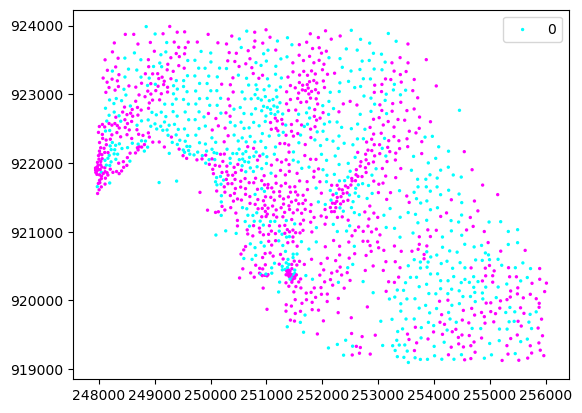

In [250]:
xs = np.array(training_mono.X_C)
ys = np.array(training_mono.Y_C)
lab= np.array(training_mono.svm_best_22_08_24)
colormap = np.array([ 'aqua', 'magenta'])
plt.scatter(ys, xs, s=2, c=colormap[lab])
plt.legend(lab)
plt.savefig('ksh_C_10_gamma_0-1_kernel_rbf_svm_best_22_08_24.png', bbox_inches='tight',  dpi=300)
plt.show()

In [251]:
#Other configurations - 1

In [252]:
predictions_mono_configuration1 = SVC(C=1, kernel='linear').fit(X_train, y_train)

In [253]:
predictions_mono_configuration1 = predictions_mono_configuration1.predict(X_mono)

In [254]:
predictions_mono_configuration1

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [255]:
predictions_mono_configuration1[predictions_mono_configuration1==-1]=0

In [256]:
sum(predictions_mono_configuration1)/training_mono.shape[0]

0.5851703406813628

In [257]:
mono_df_configuration1=pd.DataFrame(predictions_mono_configuration1)

In [258]:
training_mono.insert(2, "svm_configuration1", predictions_mono_configuration1)

In [259]:
training_mono=training_mono.iloc[:, 0:3]

In [260]:
training_mono

,X_C,Y_C,svm_configuration1
0,919729.743333,253500.996667,0
1,922129.150000,248336.643333,0
2,921097.226667,250946.403333,0
3,922932.003333,249384.803333,0
4,920497.100000,251283.926667,0
...,...,...,...
1595,922918.636667,248192.183333,0
1597,923196.840000,248332.326667,1
1598,923029.516667,248126.393333,1
1601,923221.670000,248237.123333,1


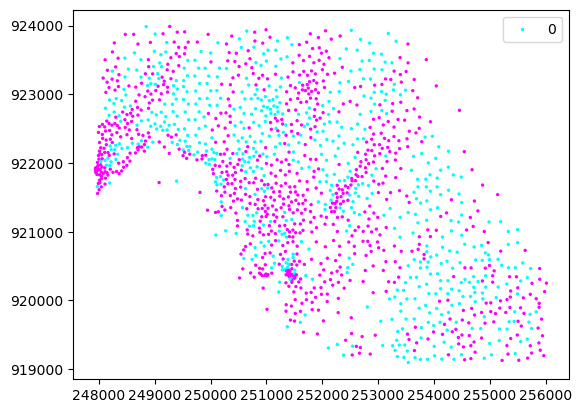

In [261]:
xs = np.array(training_mono.X_C)
ys = np.array(training_mono.Y_C)
lab= np.array(training_mono.svm_configuration1)
colormap = np.array([ 'aqua', 'magenta'])
plt.scatter(ys, xs, s=2, c=colormap[lab])
plt.legend(lab)
plt.savefig('ksh_C_1_kernel_linear_22_08_24.png', bbox_inches='tight',  dpi=300)
plt.show()

In [262]:
#Other configurations - 2

In [263]:
predictions_mono_configuration2 = SVC(C=10, kernel='linear').fit(X_train, y_train)

In [264]:
predictions_mono_configuration2 = predictions_mono_configuration2.predict(X_mono)

In [265]:
predictions_mono_configuration2

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [266]:
predictions_mono_configuration2[predictions_mono_configuration2==-1]=0

In [267]:
sum(predictions_mono_configuration2)/training_mono.shape[0]

0.633934535738143

In [268]:
mono_df_configuration2=pd.DataFrame(predictions_mono_configuration2)

In [269]:
training_mono.insert(2, "svm_configuration2_corrected_2", predictions_mono_configuration2)

In [270]:
training_mono=training_mono.iloc[:, 0:3]

In [271]:
training_mono

,X_C,Y_C,svm_configuration2_corrected_2
0,919729.743333,253500.996667,0
1,922129.150000,248336.643333,0
2,921097.226667,250946.403333,0
3,922932.003333,249384.803333,0
4,920497.100000,251283.926667,0
...,...,...,...
1595,922918.636667,248192.183333,0
1597,923196.840000,248332.326667,1
1598,923029.516667,248126.393333,1
1601,923221.670000,248237.123333,1


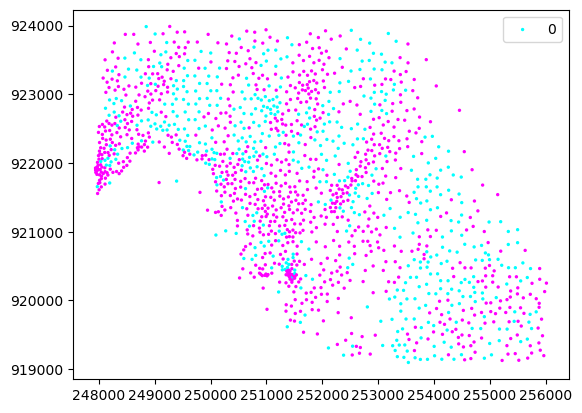

In [272]:
xs = np.array(training_mono.X_C)
ys = np.array(training_mono.Y_C)
lab= np.array(training_mono.svm_configuration2_corrected_2)
colormap = np.array([ 'aqua', 'magenta'])
plt.scatter(ys, xs, s=2, c=colormap[lab])
plt.legend(lab)
plt.savefig('ksh_C_10_kernel_linear_22_08_24.png', bbox_inches='tight',  dpi=300)
plt.show()

In [273]:
#Other configurations - 3

In [274]:
predictions_mono_configuration3 = SVC(C=10, gamma=0.01, kernel='rbf').fit(X_train, y_train)

In [275]:
predictions_mono_configuration3 = predictions_mono_configuration3.predict(X_mono)

In [276]:
predictions_mono_configuration3

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

In [277]:
predictions_mono_configuration3[predictions_mono_configuration3==-1]=0

In [278]:
sum(predictions_mono_configuration3)/training_mono.shape[0]

0.5798263193052772

In [279]:
mono_df_configuration3=pd.DataFrame(predictions_mono_configuration3)

In [280]:
training_mono.insert(2, "svm_configuration3", predictions_mono_configuration3)

In [281]:
training_mono=training_mono.iloc[:, 0:3]

In [282]:
training_mono

,X_C,Y_C,svm_configuration3
0,919729.743333,253500.996667,0
1,922129.150000,248336.643333,0
2,921097.226667,250946.403333,0
3,922932.003333,249384.803333,0
4,920497.100000,251283.926667,0
...,...,...,...
1595,922918.636667,248192.183333,0
1597,923196.840000,248332.326667,1
1598,923029.516667,248126.393333,1
1601,923221.670000,248237.123333,1


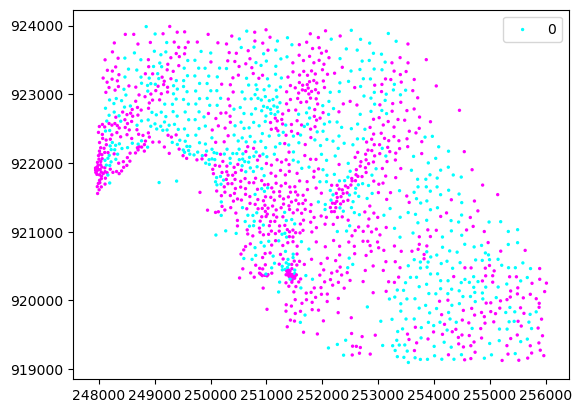

In [283]:
xs = np.array(training_mono.X_C)
ys = np.array(training_mono.Y_C)
lab= np.array(training_mono.svm_configuration3)
colormap = np.array([ 'aqua', 'magenta'])
plt.scatter(ys, xs, s=2, c=colormap[lab])
plt.legend(lab)
plt.savefig('ksh_C_10_gamma_0-0-1_kernel_rbf_22_08_24.png', bbox_inches='tight',  dpi=300)
plt.show()